In [1]:
import numpy as np
import cmdstanpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import arviz as az
import pandas as pd

In [2]:
df = pd.read_csv('./mon.csv')
df['subn'] = df['sub'].rank(method='dense').astype(int)

refValue = 5
refProbability = 1
refAmbiguity = 1

seed = 10112015

In [3]:
N = df.shape[0]
choice = df['choice'].astype(int)
refProbabilities = np.repeat(refProbability, N)
refValues=np.repeat(refValue, N)
lotteryProbabilities = df['risk'].astype(float)
ID = df['subn'].astype('int')
lotteryValues = df['value'].astype('int')
n_sub = len(df['sub'].unique())

In [4]:
# define dictionary of data
standata_simple = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [5]:
simpleModel = cmdstanpy.CmdStanModel(stan_file='simpleModel.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
fit_simple_model = simpleModel.sample(
  data = standata_simple,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
ERROR:cmdstanpy:Error in progress bar initialization:
	IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Disabling progress bars for this session
Exception ignored in: <function tqdm.__del__ at 0x7f9600702ca0>
Traceback (most recent call last):
  File "/home/nachshon/anaconda3/envs/risk/lib/python3.8/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/home/nachshon/anaconda3/envs/risk/lib/python3.8/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


INFO:cmdstanpy:CmdStan done processing.


In [7]:
fit_simple_model.draws(concat_chains=True).shape

(4000, 11841)

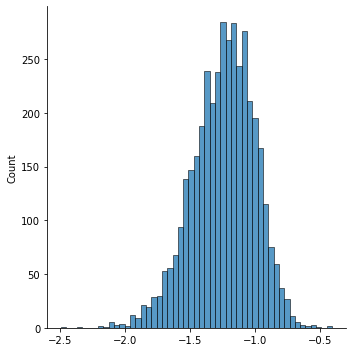

In [8]:
draws_rmu = fit_simple_model.stan_variable(var='rMu')
sns.displot(draws_rmu)

In [9]:
cmdstanpy_data = az.from_cmdstanpy(posterior=fit_simple_model)

In [10]:
az.summary(cmdstanpy_data, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.348,0.183,0.035,0.659,0.004,0.003,2077.0,1418.0,1.00
riskTol[1],0.153,0.072,0.023,0.277,0.002,0.001,1538.0,2235.0,1.00
riskTol[2],1.014,0.486,0.018,1.675,0.028,0.020,381.0,759.0,1.01
riskTol[3],0.523,0.324,0.014,1.050,0.008,0.006,1424.0,1853.0,1.00
riskTol[4],0.104,0.052,0.015,0.202,0.001,0.001,1317.0,1123.0,1.00
riskTol[5],0.229,0.162,0.016,0.515,0.003,0.002,2168.0,1807.0,1.00
riskTol[6],0.203,0.096,0.034,0.373,0.002,0.001,2365.0,1837.0,1.00
riskTol[7],0.502,0.153,0.120,0.741,0.005,0.003,1404.0,639.0,1.00
riskTol[8],0.186,0.103,0.013,0.362,0.002,0.002,1406.0,1135.0,1.00
riskTol[9],0.638,0.237,0.106,1.007,0.008,0.006,1079.0,1122.0,1.00


In [11]:
AmbiguityModel = cmdstanpy.CmdStanModel(stan_file='AmbiguityModel.stan')

INFO:cmdstanpy:compiling stan file /home/nachshon/Documents/Aging/Aging/RiskandAmbiguity/AmbiguityModel.stan to exe file /home/nachshon/Documents/Aging/Aging/RiskandAmbiguity/AmbiguityModel
INFO:cmdstanpy:compiled model executable: /home/nachshon/Documents/Aging/Aging/RiskandAmbiguity/AmbiguityModel


In [12]:
refAmbiguities = np.repeat(refAmbiguity, N)
lotteryAmbiguities = df['ambiguity'].astype(float)

In [13]:
# define dictionary of data
standata_ambiguity = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refAmbiguities' : refAmbiguities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'lotteryAmbiguities' : lotteryAmbiguities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [14]:
fit_ambiguity_model = AmbiguityModel.sample(
  data = standata_ambiguity,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
cmdstanpy_data_amb = az.from_cmdstanpy(posterior=fit_ambiguity_model)

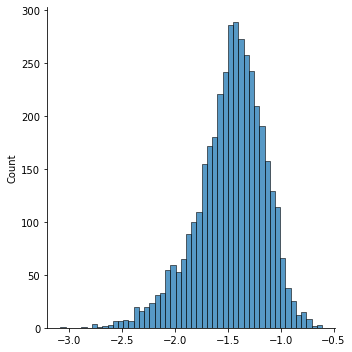

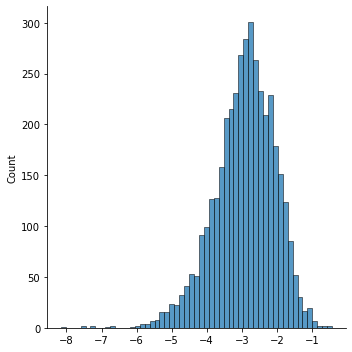

In [16]:
draws_rmu = fit_ambiguity_model.stan_variable(var='aMu')
draws_bmu = fit_ambiguity_model.stan_variable(var='bMu')
sns.displot(draws_rmu)
sns.displot(draws_bmu)

In [17]:
az.summary(cmdstanpy_data_amb, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.312,0.177,0.021,0.614,0.005,0.004,1248.0,1232.0,1.01
riskTol[1],0.132,0.069,0.019,0.257,0.002,0.002,790.0,1291.0,1.00
riskTol[2],0.394,0.485,0.001,1.385,0.141,0.103,17.0,89.0,1.16
riskTol[3],0.442,0.294,0.007,0.924,0.018,0.013,276.0,1609.0,1.02
riskTol[4],0.094,0.051,0.009,0.188,0.001,0.001,1014.0,1466.0,1.01
riskTol[5],0.191,0.138,0.006,0.434,0.005,0.003,616.0,999.0,1.01
riskTol[6],0.180,0.093,0.021,0.348,0.002,0.002,1340.0,1138.0,1.01
riskTol[7],0.456,0.168,0.065,0.704,0.006,0.004,948.0,654.0,1.01
riskTol[8],0.165,0.099,0.009,0.333,0.003,0.002,997.0,934.0,1.01
riskTol[9],0.542,0.273,0.016,0.935,0.011,0.007,703.0,1034.0,1.01


In [18]:
az.summary(cmdstanpy_data_amb, var_names=['ambTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ambTol[0],0.103,0.166,0.0,0.404,0.005,0.003,939.0,1227.0,1.02
ambTol[1],0.044,0.053,0.0,0.145,0.001,0.001,719.0,1080.0,1.01
ambTol[2],7.507,11.232,0.0,21.578,1.574,1.119,15.0,320.0,1.19
ambTol[3],0.423,2.400,0.0,1.461,0.045,0.032,395.0,1132.0,1.05
ambTol[4],0.042,0.052,0.0,0.135,0.001,0.001,738.0,1672.0,1.02
ambTol[5],0.151,0.369,0.0,0.584,0.008,0.005,1215.0,1138.0,1.03
ambTol[6],0.117,0.147,0.0,0.417,0.007,0.005,934.0,927.0,1.03
ambTol[7],0.087,0.155,0.0,0.316,0.004,0.003,983.0,1286.0,1.02
ambTol[8],0.079,0.106,0.0,0.289,0.003,0.002,1055.0,1080.0,1.02
ambTol[9],0.087,0.164,0.0,0.296,0.004,0.003,1036.0,1410.0,1.01
